## Case Study on Testing of Hypothesis

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv(r'C:\Users\sajee\Downloads\AATHIRA DSA\Sales_add.csv')  
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [3]:
data.shape

(22, 5)

In [4]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


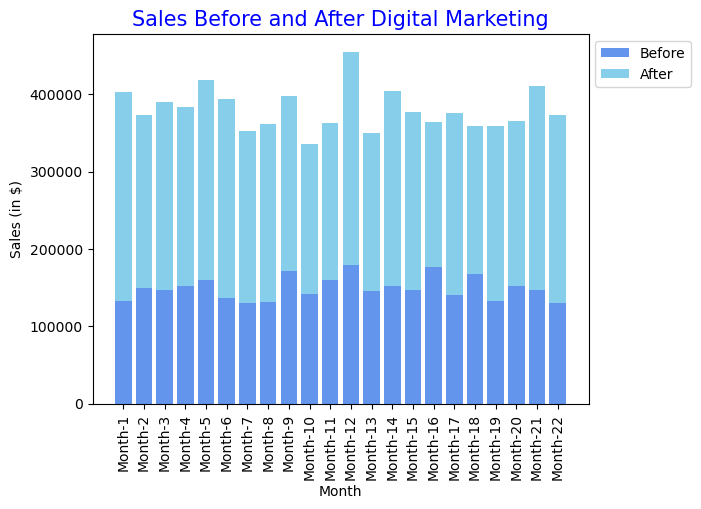

In [5]:
import matplotlib.pyplot as plt
xaxis = data['Month']
sales_before = data['Sales_before_digital_add(in $)']
sales_after = data['Sales_After_digital_add(in $)']

# Create a stacked bar plot
plt.bar(xaxis, sales_before, label='Before',color='cornflowerblue')
plt.bar(xaxis, sales_after, bottom=sales_before, label='After',color ='skyblue')

plt.xlabel('Month')
plt.ylabel('Sales (in $)')
plt.title('Sales Before and After Digital Marketing',color ='b',size='15')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()

## The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

###### To determine whether there is any increase in sales after implementing digital marketing, the most suitable test would be the T-Test. The t-test is commonly used when you have a small sample size and the population standard deviation is unknown.

###### Formulate the hypotheses:
###### Null hypothesis (H0): There is no increase in sales after implementing digital marketing (the population mean sales after digital marketing is equal to the population mean sales before digital marketing).
###### Alternative hypothesis (HA): There is an increase in sales after implementing digital marketing (the population mean sales after digital marketing is greater than the population mean sales before digital marketing).

In [6]:
from scipy.stats import ttest_rel

In [7]:
t_stat,p_value = ttest_rel(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'])

In [8]:
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -12.09070525287017
P-value: 6.336667004575778e-11


In [9]:
if p_value < 0.05:
    print('Null Hypothesis Rejected')
else:
    print('Null Hypothesis Accepted')

Null Hypothesis Rejected


###### In summary, the analysis suggests that digital marketing has had a positive impact on sales, resulting in a statistically significant increase.

## The company needs to check whether there is any dependency between the features “Region” and “Manager”.

###### By conducting the Chi-Square test, you can determine if there is a statistically significant association between the two categorical variables.

###### Formulate the hypotheses:
###### The null hypothesis (H0) would be that there is no dependency between "Region" and "Manager."
###### The alternative hypothesis (HA) would be that there is a dependency between "Region" and "Manager."

In [10]:
from scipy.stats import chi2_contingency

In [11]:
contingency_table = pd.crosstab(data['Region'], data['Manager'])

In [12]:
contingency_table

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [13]:
chi2_stat,p_value,dof,expected = chi2_contingency(contingency_table)

In [14]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=3.050566893424036, pvalue=0.5493991051158094, dof=4, expected_freq=array([[4.09090909, 3.18181818, 2.72727273],
       [2.86363636, 2.22727273, 1.90909091],
       [2.04545455, 1.59090909, 1.36363636]]))

In [15]:
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 3.050566893424036
P-value: 0.5493991051158094
Degrees of freedom: 4
Expected frequencies:
 [[4.09090909 3.18181818 2.72727273]
 [2.86363636 2.22727273 1.90909091]
 [2.04545455 1.59090909 1.36363636]]


In [16]:
if p_value < 0.05:
    print('Null Hypothesis Rejected')
else:
    print('Null Hypothesis Accepted')

Null Hypothesis Accepted


###### In summary, we can conclude that there is no significant dependency between the "Region" and "Manager" variables in terms of the provided dataset.

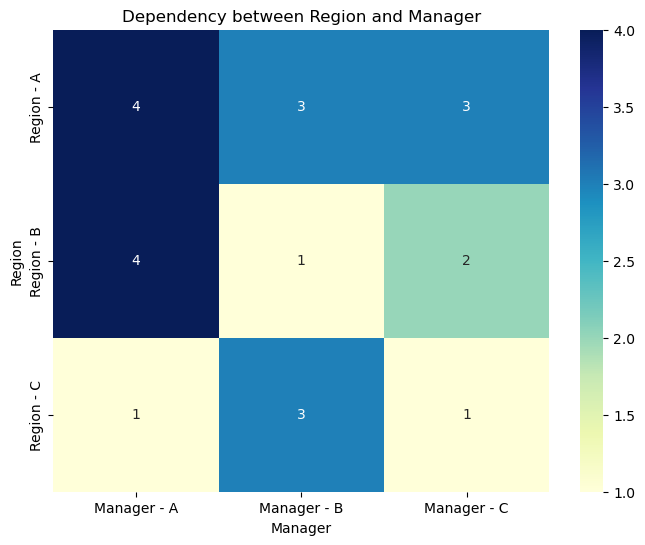

In [17]:
import seaborn as sns
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')

plt.xlabel('Manager')
plt.ylabel('Region')
plt.title('Dependency between Region and Manager')
plt.show()